## Loading Normal Dataset

In [55]:
import pandas as pd
dataset = pd.read_csv("Dataset/combined_features_dataset.csv")

dataset.head()

,RMSE,Zero_Crossing_Rate,Mel_Spectrogram_Mean,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,...,Chroma_11,Chroma_12,Tempo,Jitter,Shimmer,Spectral_Flatness,Spectral_Rolloff,Duration,Silence,Emotion
0,0.014747,0.181806,-49.928920,-565.68760,43.782420,-3.419823,4.879561,-11.828972,-7.854157,-10.851251,...,0.356888,0.346651,123.046875,0.006238,1.162623,0.248231,4459.857647,3.0,0.177989,angry
1,0.010142,0.164250,-53.197456,-605.44180,45.174736,-5.537606,6.142505,-2.014863,-10.605732,-15.667695,...,0.345317,0.357653,103.359375,0.006066,0.915142,0.306430,3734.354342,3.0,0.256070,fearful
2,0.047152,0.237027,-38.741500,-443.21610,24.900938,-30.117960,0.428244,-11.970781,-20.010164,-16.112022,...,0.492545,0.463739,123.046875,0.004500,0.618952,0.068761,5455.354192,3.0,0.000000,fearful
3,0.030824,0.148445,-41.572445,-473.73538,44.729717,-10.718471,6.005490,-12.931274,-14.678432,-5.036605,...,0.286623,0.297752,123.046875,0.005488,0.827023,0.231424,3929.312650,3.0,0.189327,angry
4,0.005151,0.137492,-58.592377,-663.29486,60.307990,1.032603,9.540112,-6.581423,-2.948161,-10.793342,...,0.264617,0.308694,135.999178,0.006102,0.933911,0.316868,3486.059946,3.0,0.267196,disgust


## Handling Missing Values



In [56]:
# Check for missing values in the dataset
missing_values_summary = dataset.isnull().sum()

# Display columns with missing values, if any
missing_values_summary[missing_values_summary > 0]


Series([], dtype: int64)

## Dropping unkwown emotion rows

In [57]:
# drop rows where Emotion is 'unkwown'
dataset = dataset[dataset['Emotion'] != 'unknown']

## Splitting Data into Train and Test Sets

In [60]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = dataset.drop(columns=['Emotion'])
y = dataset['Emotion']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the sizes of the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 11553 samples
Testing set size: 2889 samples


##  Handling Class Imbalance

In [61]:
from imblearn.over_sampling import SMOTE

# Ensure y_train is a 1D array for SMOTE
y_train = y_train.squeeze()

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the training set
X_train, y_train = smote.fit_resample(X_train, y_train)

# Verify the new class distribution
print("Class distribution after applying SMOTE:")
print(y_train.value_counts())

# Save the updated training data back to the same variables
print("X_train and y_train have been updated with resampled data.")

print("Class imbalance handled using SMOTE.")


Class distribution after applying SMOTE:
Emotion
disgust      2012
neutral      2012
fearful      2012
happy        2012
sad          2012
angry        2012
surprised    2012
Name: count, dtype: int64
X_train and y_train have been updated with resampled data.
Class imbalance handled using SMOTE.


## Normalization of Features

In [62]:
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

# Verify the transformation
print("Training data after normalization:")
print(X_train[:5])

print("Testing data after normalization:")
print(X_test[:5])


Training data after normalization:
[[-3.16822636e-01  3.49931061e-01 -1.75376203e-01 -2.11641943e-01
  -7.02186194e-01  7.63069176e-01  2.61093894e-01  1.15316454e-02
  -5.33262009e-01  7.20017328e-01 -1.17182753e+00  7.36876228e-01
  -9.12991600e-01 -4.51392350e-01  6.17885430e-01 -1.37195502e+00
  -7.49801515e-01  1.30884135e+00 -1.93235275e+00  1.06082511e+00
  -1.06886500e+00 -3.45078852e-01  4.89594177e-01  2.26693648e-01
  -4.24390315e-01  1.14409322e+00  7.56116342e-01 -1.15948991e+00
   4.82568728e-01 -1.25475216e+00  3.70161553e-01  6.29396535e-01
   8.04329596e-01 -1.14984437e+00  7.02041971e-01  1.51395843e+00
  -9.52918570e-01  2.91694897e-02 -3.69166312e-01 -1.19226582e+00
   1.15532655e+00 -4.10146490e-01  6.94608251e-01 -5.93244759e-02
   9.56196401e-01 -8.39617267e-02  4.53225928e-01 -5.55203156e-01
  -6.04516230e-01 -7.20485019e-01 -1.12885613e+00 -8.78014401e-01
  -5.07131532e-01 -2.75595064e-01 -1.76028397e-01 -7.40123213e-01
  -1.32577052e+00 -1.32694545e+00 -8.1140

## Encode the Target Variable

In [63]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training target
y_train = label_encoder.fit_transform(y_train)

# Transform the testing target using the same encoder
y_test = label_encoder.transform(y_test)

# Check the encoded values
print("Classes:", label_encoder.classes_)
print("Encoded y_train:", y_train[:5])
print("Encoded y_test:", y_test[:5])

print("Target variable encoded successfully!")


Classes: ['angry' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']
Encoded y_train: [1 4 4 2 3]
Encoded y_test: [3 3 3 1 0]
Target variable encoded successfully!


## Training SVM

In [64]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

# Train and evaluate a basic SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print("Basic SVM Model Performance:")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Basic SVM Model Performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       491
           1       0.73      0.62      0.67       491
           2       0.46      0.46      0.46       331
           3       0.71      0.65      0.68       491
           4       0.66      0.73      0.69       493
           5       0.71      0.71      0.71       503
           6       0.51      0.89      0.65        89

    accuracy                           0.68      2889
   macro avg       0.65      0.69      0.66      2889
weighted avg       0.68      0.68      0.68      2889


Confusion Matrix:
 [[389  23  27  38   5   1   8]
 [ 29 304  37  30  41  43   7]
 [ 20  24 153  30  32  53  19]
 [ 42  16  39 318  39  10  27]
 [  1  30  38  23 358  37   6]
 [  1  21  42   6  66 358   9]
 [  1   1   0   0   4   4  79]]

Accuracy Score: 0.6780893042575286


## Finetuning SVM

In [53]:
# Perform Grid Search for Hyperparameter Tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.638 total time=   3.9s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.640 total time=   4.1s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.644 total time=   4.1s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.638 total time=   4.2s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.647 total time=   4.4s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.720 total time=   4.6s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.718 total time=   4.7s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.712 total time=   4.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.391 total time=  11.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.383 total time=  11.2s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.387 total time=  11.5s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear

In [54]:
# Train the SVM with the best parameters
best_svm_model = grid_search.best_estimator_
y_pred_best = best_svm_model.predict(X_test)

print("Optimized SVM Model Performance:")
print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_best))

Optimized SVM Model Performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       491
           1       0.57      0.72      0.63       491
           2       0.56      0.43      0.48       331
           3       0.73      0.70      0.72       491
           4       0.76      0.69      0.72       493
           5       0.71      0.73      0.72       491
           6       1.00      0.90      0.95        77

    accuracy                           0.70      2865
   macro avg       0.73      0.71      0.72      2865
weighted avg       0.70      0.70      0.70      2865


Confusion Matrix:
 [[395  39  18  32   4   3   0]
 [ 23 355  25  23  26  39   0]
 [ 23  54 141  38  18  57   0]
 [ 41  45  19 346  28  12   0]
 [  5  65  23  23 342  35   0]
 [  0  66  27   7  33 358   0]
 [  2   4   0   2   0   0  69]]

Accuracy Score: 0.7001745200698081


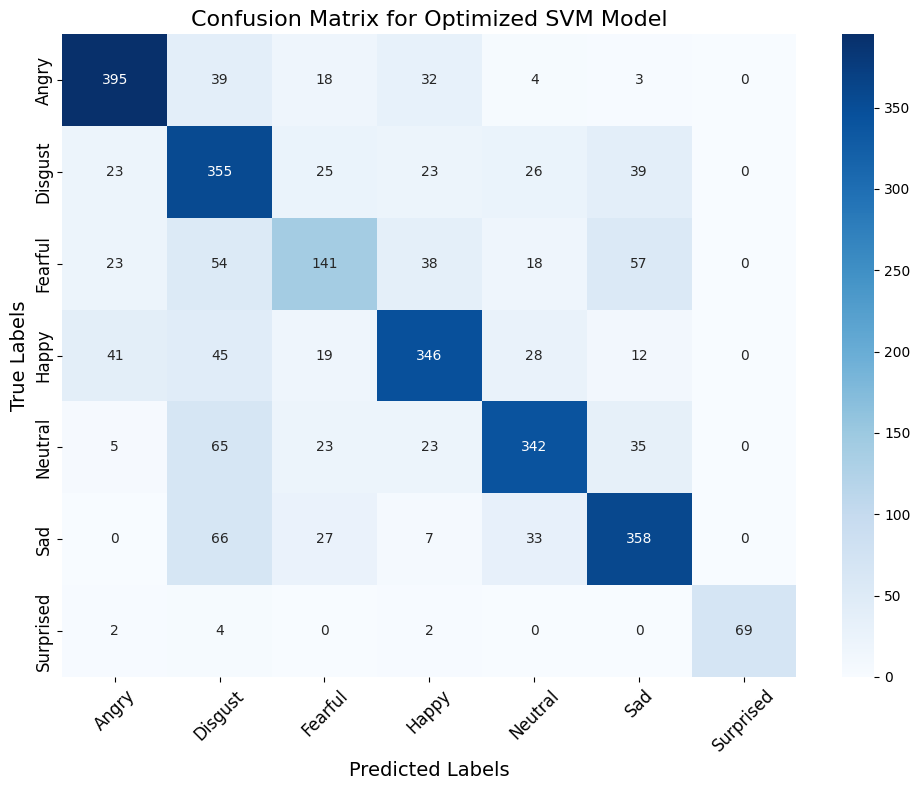

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Hardcoded confusion matrix
confusion_matrix = np.array([
    [395,  39,  18,  32,   4,   3,   0],
    [ 23, 355,  25,  23,  26,  39,   0],
    [ 23,  54, 141,  38,  18,  57,   0],
    [ 41,  45,  19, 346,  28,  12,   0],
    [  5,  65,  23,  23, 342,  35,   0],
    [  0,  66,  27,   7,  33, 358,   0],
    [  2,   4,   0,   2,   0,   0,  69]
])

# Class labels
class_labels = ["Angry", "Disgust", "Fearful", "Happy", "Neutral", "Sad", "Surprised"]

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Adding labels, title, and formatting
plt.title("Confusion Matrix for Optimized SVM Model", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


## Loading Augmented Dataset

In [65]:
import pandas as pd
dataset = pd.read_csv("Dataset/augmented_combined_features_dataset.csv")

## Handling Missing Values



In [66]:
# Check for missing values in the dataset
missing_values_summary = dataset.isnull().sum()

# Display columns with missing values, if any
missing_values_summary[missing_values_summary > 0]


Series([], dtype: int64)

## Dropping unkwown emotion rows

In [67]:
# drop rows where Emotion is 'unkwown'
dataset = dataset[dataset['Emotion'] != 'unknown']

## Splitting Data into Train and Test Sets

In [68]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = dataset.drop(columns=['Emotion'])
y = dataset['Emotion']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the sizes of the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 12753 samples
Testing set size: 3189 samples


##  Handling Class Imbalance

In [69]:
from imblearn.over_sampling import SMOTE

# Ensure y_train is a 1D array for SMOTE
y_train = y_train.squeeze()

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the training set
X_train, y_train = smote.fit_resample(X_train, y_train)

# Verify the new class distribution
print("Class distribution after applying SMOTE:")
print(y_train.value_counts())

# Save the updated training data back to the same variables
print("X_train and y_train have been updated with resampled data.")

print("Class imbalance handled using SMOTE.")


Class distribution after applying SMOTE:
Emotion
happy        2259
sad          2259
disgust      2259
fearful      2259
surprised    2259
angry        2259
neutral      2259
calm         2259
Name: count, dtype: int64
X_train and y_train have been updated with resampled data.
Class imbalance handled using SMOTE.


## Normalization of Features

In [70]:
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

# Verify the transformation
print("Training data after normalization:")
print(X_train[:5])

print("Testing data after normalization:")
print(X_test[:5])


Training data after normalization:
[[ 2.25553096e+00 -2.86881416e-01  1.51591043e+00  1.54810454e+00
   4.60109358e-03  3.99820206e-01  2.70770290e-01  5.20080234e-03
   1.28931508e-01  7.42699205e-01  1.69486588e-01 -1.32810356e+00
   8.87126740e-02 -6.96839418e-01 -9.18708011e-01  8.02780858e-01
   9.58990076e-02 -4.76035079e-01 -1.15287776e+00 -7.15085243e-01
  -1.50271850e+00 -3.55771161e-01 -8.11169470e-01 -2.27438371e-02
  -1.85901910e-01  2.01360929e-01  2.06069760e-01  5.46749460e-01
   7.74300725e-01  3.76875585e-01 -2.89806408e-01  1.15298616e-01
  -6.39637628e-02 -4.80202543e-01 -3.82915961e-01 -7.88434519e-01
  -6.08394039e-01 -6.31816216e-01 -1.57177100e-01 -6.45510976e-02
   1.75782037e-01  3.80538116e-01 -3.65210017e-01 -4.49744805e-01
   1.44053559e-01  1.04052409e+00  1.38672963e+00 -9.05263946e-01
  -5.04394518e-01 -1.05479177e+00 -1.16603961e+00 -1.11903722e+00
  -8.99086331e-01 -9.32101181e-01 -6.55567021e-01 -1.21985190e-01
  -1.16312326e-01 -5.24715088e-01 -8.9802

## Encode the Target Variable

In [71]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training target
y_train = label_encoder.fit_transform(y_train)

# Transform the testing target using the same encoder
y_test = label_encoder.transform(y_test)

# Check the encoded values
print("Classes:", label_encoder.classes_)
print("Encoded y_train:", y_train[:5])
print("Encoded y_test:", y_test[:5])

print("Target variable encoded successfully!")


Classes: ['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']
Encoded y_train: [4 6 6 2 3]
Encoded y_test: [0 4 0 7 7]
Target variable encoded successfully!


## Training SVM

In [72]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

# Train and evaluate a basic SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print("Basic SVM Model Performance:")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Basic SVM Model Performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       524
           1       0.42      0.81      0.55        31
           2       0.69      0.63      0.66       524
           3       0.48      0.45      0.46       363
           4       0.69      0.59      0.64       522
           5       0.66      0.70      0.68       508
           6       0.74      0.67      0.70       565
           7       0.57      0.95      0.71       152

    accuracy                           0.67      3189
   macro avg       0.62      0.70      0.65      3189
weighted avg       0.67      0.67      0.67      3189


Confusion Matrix:
 [[413   0  22  20  46   4   1  18]
 [  0  25   0   0   0   5   0   1]
 [ 32   5 332  26  33  52  34  10]
 [ 39   2  23 165  30  28  53  23]
 [ 58   1  24  50 310  34  11  34]
 [  5  11  41  34  19 356  32  10]
 [  5  15  36  51   9  56 380  13]
 [  0   1   1   1   0   1   4 1

## Finetuning SVM

In [73]:
# Perform Grid Search for Hyperparameter Tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.663 total time=   6.7s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.650 total time=   6.8s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.679 total time=   7.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.665 total time=   7.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.675 total time=   7.8s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.757 total time=   7.5s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.755 total time=   7.7s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.769 total time=   7.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.147 total time=  21.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.159 total time=  21.9s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.785 total time=   7.4s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf

In [74]:
# Train the SVM with the best parameters
best_svm_model = grid_search.best_estimator_
y_pred_best = best_svm_model.predict(X_test)

print("Optimized SVM Model Performance:")
print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_best))

Optimized SVM Model Performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.79       524
           1       0.58      0.58      0.58        31
           2       0.64      0.66      0.65       524
           3       0.51      0.52      0.52       363
           4       0.74      0.67      0.70       522
           5       0.70      0.73      0.72       508
           6       0.75      0.70      0.73       565
           7       0.87      0.87      0.87       152

    accuracy                           0.70      3189
   macro avg       0.69      0.69      0.69      3189
weighted avg       0.70      0.70      0.70      3189


Confusion Matrix:
 [[425   0  31  20  38   4   4   2]
 [  0  18   0   0   1   7   5   0]
 [ 39   3 347  35  24  46  28   2]
 [ 31   1  29 190  31  27  48   6]
 [ 48   0  29  48 348  31  13   5]
 [  8   3  48  31  16 372  28   2]
 [  7   6  54  48   6  44 398   2]
 [  0   0   6   2   5   1  

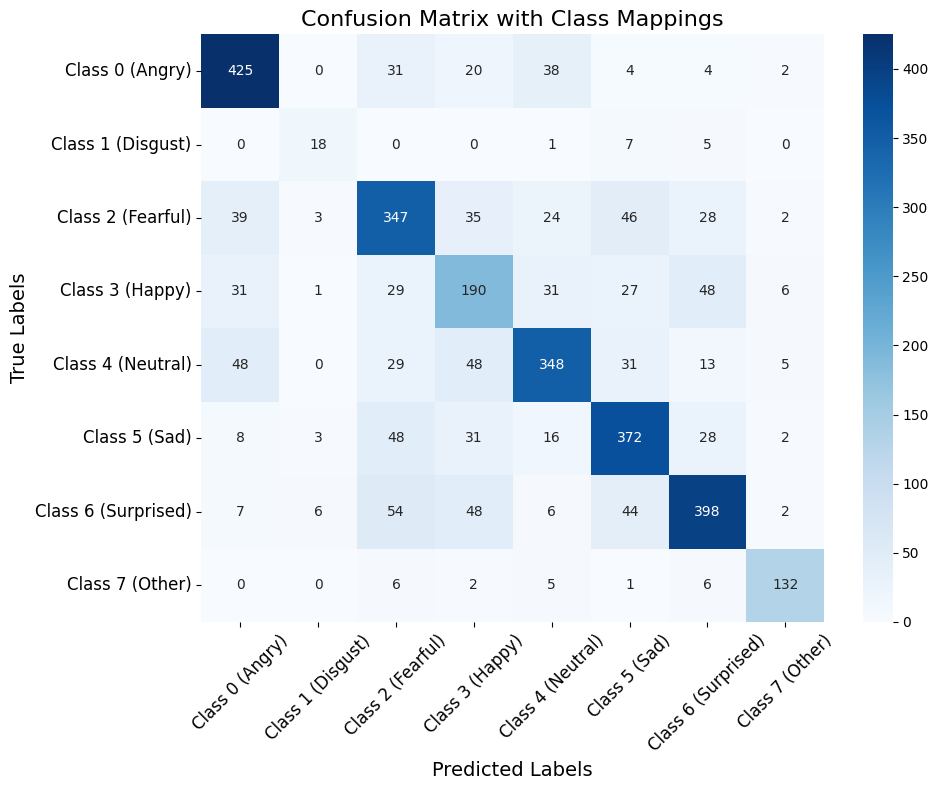

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Hardcoded confusion matrix
confusion_matrix = np.array([
    [425,   0,  31,  20,  38,   4,   4,   2],
    [  0,  18,   0,   0,   1,   7,   5,   0],
    [ 39,   3, 347,  35,  24,  46,  28,   2],
    [ 31,   1,  29, 190,  31,  27,  48,   6],
    [ 48,   0,  29,  48, 348,  31,  13,   5],
    [  8,   3,  48,  31,  16, 372,  28,   2],
    [  7,   6,  54,  48,   6,  44, 398,   2],
    [  0,   0,   6,   2,   5,   1,   6, 132]
])

# Class labels with mappings
class_labels = [
    "Class 0 (Angry)", 
    "Class 1 (Disgust)", 
    "Class 2 (Fearful)", 
    "Class 3 (Happy)", 
    "Class 4 (Neutral)", 
    "Class 5 (Sad)", 
    "Class 6 (Surprised)", 
    "Class 7 (Other)"
]

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Adding labels, title, and formatting
plt.title("Confusion Matrix with Class Mappings", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


In [77]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import numpy as np


# Best parameters obtained from Grid Search
best_params = {
    'C': 100,
    'gamma': 0.01,
    'kernel': 'rbf'
}

# Initialize SVM with the best parameters
best_svm_model = SVC(
    C=best_params['C'],
    gamma=best_params['gamma'],
    kernel=best_params['kernel'],
    random_state=42
)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Metrics storage
fold_accuracies = []
fold_macro_f1_scores = []

# Perform 5-Fold Cross-Validation
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
    print(f"Processing Fold {fold + 1}...")
    
    # Split data for this fold
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
    
    # Train the model on the training fold
    best_svm_model.fit(X_train_fold, y_train_fold)
    
    # Validate on the validation fold
    y_pred_fold = best_svm_model.predict(X_val_fold)
    
    # Compute metrics for this fold
    fold_accuracy = accuracy_score(y_val_fold, y_pred_fold)
    fold_macro_f1 = f1_score(y_val_fold, y_pred_fold, average='macro')
    fold_accuracies.append(fold_accuracy)
    fold_macro_f1_scores.append(fold_macro_f1)
    
    print(f"Fold {fold + 1} Accuracy: {fold_accuracy}")
    print(f"Fold {fold + 1} Macro F1-Score: {fold_macro_f1}")

# Compute average cross-validation accuracy and macro F1-score
average_cv_accuracy = np.mean(fold_accuracies)
average_macro_f1_score = np.mean(fold_macro_f1_scores)

print("\n5-Fold Cross-Validation Results:")
print(f"Cross-Validation Fold Accuracies: {fold_accuracies}")
print(f"Average Cross-Validation Accuracy: {average_cv_accuracy}")
print(f"Cross-Validation Macro F1-Scores: {fold_macro_f1_scores}")
print(f"Average Cross-Validation Macro F1-Score: {average_macro_f1_score}")

# Train Final Model on Entire Training Set
print("\nTraining Final Model on Entire Training Set...")
best_svm_model.fit(X_train, y_train)

# Evaluate on the Test Set
y_test_pred = best_svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_macro_f1_score = f1_score(y_test, y_test_pred, average='macro')
test_classification_report = classification_report(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

print("\nTest Set Evaluation Results:")
print(f"Test Set Accuracy: {test_accuracy}")
print(f"Test Set Macro F1-Score: {test_macro_f1_score}")
print(f"\nTest Set Classification Report:\n{test_classification_report}")
print(f"\nTest Set Confusion Matrix:\n{test_confusion_matrix}")


Processing Fold 1...
Fold 1 Accuracy: 0.7922544951590594
Fold 1 Macro F1-Score: 0.7915968385879324
Processing Fold 2...
Fold 2 Accuracy: 0.8080221300138313
Fold 2 Macro F1-Score: 0.8071665367741307
Processing Fold 3...
Fold 3 Accuracy: 0.789983397897067
Fold 3 Macro F1-Score: 0.7890601527386347
Processing Fold 4...
Fold 4 Accuracy: 0.7913669064748201
Fold 4 Macro F1-Score: 0.7901728150026979
Processing Fold 5...
Fold 5 Accuracy: 0.7825124515771997
Fold 5 Macro F1-Score: 0.7813276604087085

5-Fold Cross-Validation Results:
Cross-Validation Fold Accuracies: [0.7922544951590594, 0.8080221300138313, 0.789983397897067, 0.7913669064748201, 0.7825124515771997]
Average Cross-Validation Accuracy: 0.7928278762243955
Cross-Validation Macro F1-Scores: [0.7915968385879324, 0.8071665367741307, 0.7890601527386347, 0.7901728150026979, 0.7813276604087085]
Average Cross-Validation Macro F1-Score: 0.7918648007024208

Training Final Model on Entire Training Set...

Test Set Evaluation Results:
Test Set Ac